<a href="https://colab.research.google.com/github/michalszczecinski/data-driven-notebooks/blob/master/programming/CP_C_logistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Computer Programming - C logistics



* Writing C code inside Google Colab Notebooks
* Compiling and running C code
* Inspecting created artefacts


## Running linux commands and magic

* Using Jupyter notebook in a linux computer allows you to run linux commands from the Notebook itself.
* Colab's backend is on a linux computer and hence it allows you to run almost all the linux commands.
* Colab also has allows it's uses to run "magic commands" 
which are a type of special commands prefixed with % or %%.

In [1]:
# To get a list of available magic commands run `%lsmagic`.
%lsmagic

Available line magics:
%alias  %alias_magic  %autocall  %automagic  %autosave  %bookmark  %cat  %cd  %clear  %colors  %config  %connect_info  %cp  %debug  %dhist  %dirs  %doctest_mode  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %lf  %lk  %ll  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %lx  %macro  %magic  %man  %matplotlib  %mkdir  %more  %mv  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %pip  %popd  %pprint  %precision  %profile  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %rep  %rerun  %reset  %reset_selective  %rm  %rmdir  %run  %save  %sc  %set_env  %shell  %store  %sx  %system  %tb  %tensorflow_version  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%bigquery  %%capture  %%debug  %%file  %%html  %%javascript  %%js  %%latex  %%perl 

### Saving source files
`%%writefile filename` command below is used to write a file to current directory in colab. 

In [26]:
%%writefile FizzBuzz.c

#include <stdio.h>

int main(void)
{
int i;
for(i=1;i<=10;++i)
{
printf("Number=%d \n",i);
}
return 0;
}

Overwriting FizzBuzz.c


In [27]:
%ls -l

total 20
-rw-r--r-- 1 root root  106 Apr 23 13:06 FizzBuzz.c
-rwxr-xr-x 1 root root 8304 Apr 23 13:06 output*
drwxr-xr-x 1 root root 4096 Apr 19 14:23 sample_data/


### Compiling

* Now we will run this code using a gcc compiler. 
* Here `%%shell`  magic command invokes linux shell(bash,etc,) to run the entire shell as a shell script. If we want to run shell command `inline`, we can use `!` in front of the command.


In [28]:
# Compile the C code into a binary file called output
%%shell
gcc FizzBuzz.c -o ./output

### Executing

On Unix-style operating systems, program are run only if you specify the directory where they live or if their directory is listed n the PATH environment variable.

In [29]:
# Run the program
!./output

Number=1 
Number=2 
Number=3 
Number=4 
Number=5 
Number=6 
Number=7 
Number=8 
Number=9 
Number=10 


In [30]:
# To check exist status of a program
! echo $?

0


## The way C works

### Source

* Computers really only understand one language: machine code, a binary stream of 1s and 0s. You convert your C code into machine code with the aid of a compiler.

`rocks.c` - we start off by creating a source file. The source file contains human-readable C code.

In [36]:
%%writefile rocks.c
#include <stdio.h>
int main()
{
puts("C Rocks!");
return 0;
}

Writing rocks.c


## Compile

We run our source code through a compiler. The compiler checks for errors, and once it's happy, it compiles the source code.

In [37]:
! gcc rocks.c -o rocks

## Output

* The compiler creates a new file called an executable. This file contains machine code, a stream of 1s and 0s that the computer understands.
* That is the program you can run.
* In Windows, this will be called `rocks.exe` instead of `rocks`.

In [38]:
! ./rocks

C Rocks!


## Display binary file in basic form (0s and 1s) [3]

* We want to be able to print binary file in the original format.
* When dealing with computers, there are two interpretations of the word binary.
  1. In terms of number system, it refers to a base 2 number system which uses two symbols, 0 and 1.
  2. When speaking of a file, it refers to a file containing non-textual data (executables, libraries, data files etc.).
* A binary file that can be run as a process is called an executable binary.
* A file being binary file doesn't simply mean that it will be displayed simply in terms of 0's and 1's. There are layers of abstractions at work as to how files are handled by a computer.
* Showing a binary file in terms of 0 and 1 would make the output unnecessarily lengthy, and is not the most optimal approach. A binary file is shown in a text editor according to the default encoding set for that editor.
* Also, if an editor is configured to show binary output, it will also display every file, even plain text ones, in terms of 0's and 1's. Everything ultimately boils down to binary when stored in a computer.
* To view a file in the most basic form of 0's and 1's, you'll need to use a special editor mode which is capable of displaying the binary data of a file. One such way is using the built-in xxd command in macOS: `xxd -b filename`. 

In [42]:
# Uncomment to install xxd
! apt-get -qq install xxd

Selecting previously unselected package xxd.
(Reading database ... 155501 files and directories currently installed.)
Preparing to unpack .../xxd_2%3a8.0.1453-1ubuntu1.8_amd64.deb ...
Unpacking xxd (2:8.0.1453-1ubuntu1.8) ...
Setting up xxd (2:8.0.1453-1ubuntu1.8) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...


In [41]:
! xxd -b ./rocks

/bin/bash: xxd: command not found


* It will display the binary dump of filename on standard output. This works equally for both binary and text files.
* A more compact and commonly used form, which is preferred over binary is hexadecimal, which uses a base 16 number system (0-9, A-F). To show the contents of file filename in hexadecimal, just run the xxd command without any options with just the filename as argument in Terminal: `xxd filename`

In [ ]:
! xxd rocks

00000000: 7f45 4c46 0201 0100 0000 0000 0000 0000  .ELF............
00000010: 0300 3e00 0100 0000 3005 0000 0000 0000  ..>.....0.......
00000020: 4000 0000 0000 0000 3019 0000 0000 0000  @.......0.......
00000030: 0000 0000 4000 3800 0900 4000 1d00 1c00  ....@.8...@.....
00000040: 0600 0000 0400 0000 4000 0000 0000 0000  ........@.......
00000050: 4000 0000 0000 0000 4000 0000 0000 0000  @.......@.......
00000060: f801 0000 0000 0000 f801 0000 0000 0000  ................
00000070: 0800 0000 0000 0000 0300 0000 0400 0000  ................
00000080: 3802 0000 0000 0000 3802 0000 0000 0000  8.......8.......
00000090: 3802 0000 0000 0000 1c00 0000 0000 0000  8...............
000000a0: 1c00 0000 0000 0000 0100 0000 0000 0000  ................
000000b0: 0100 0000 0500 0000 0000 0000 0000 0000  ................
000000c0: 0000 0000 0000 0000 0000 0000 0000 0000  ................
000000d0: 3808 0000 0000 0000 3808 0000 0000 0000  8.......8.......
000000e0: 0000 2000 0000 0000 0100 0000 0600 000

## Bonus: How to Run C in Visual Studio Code on Mac OS [4]

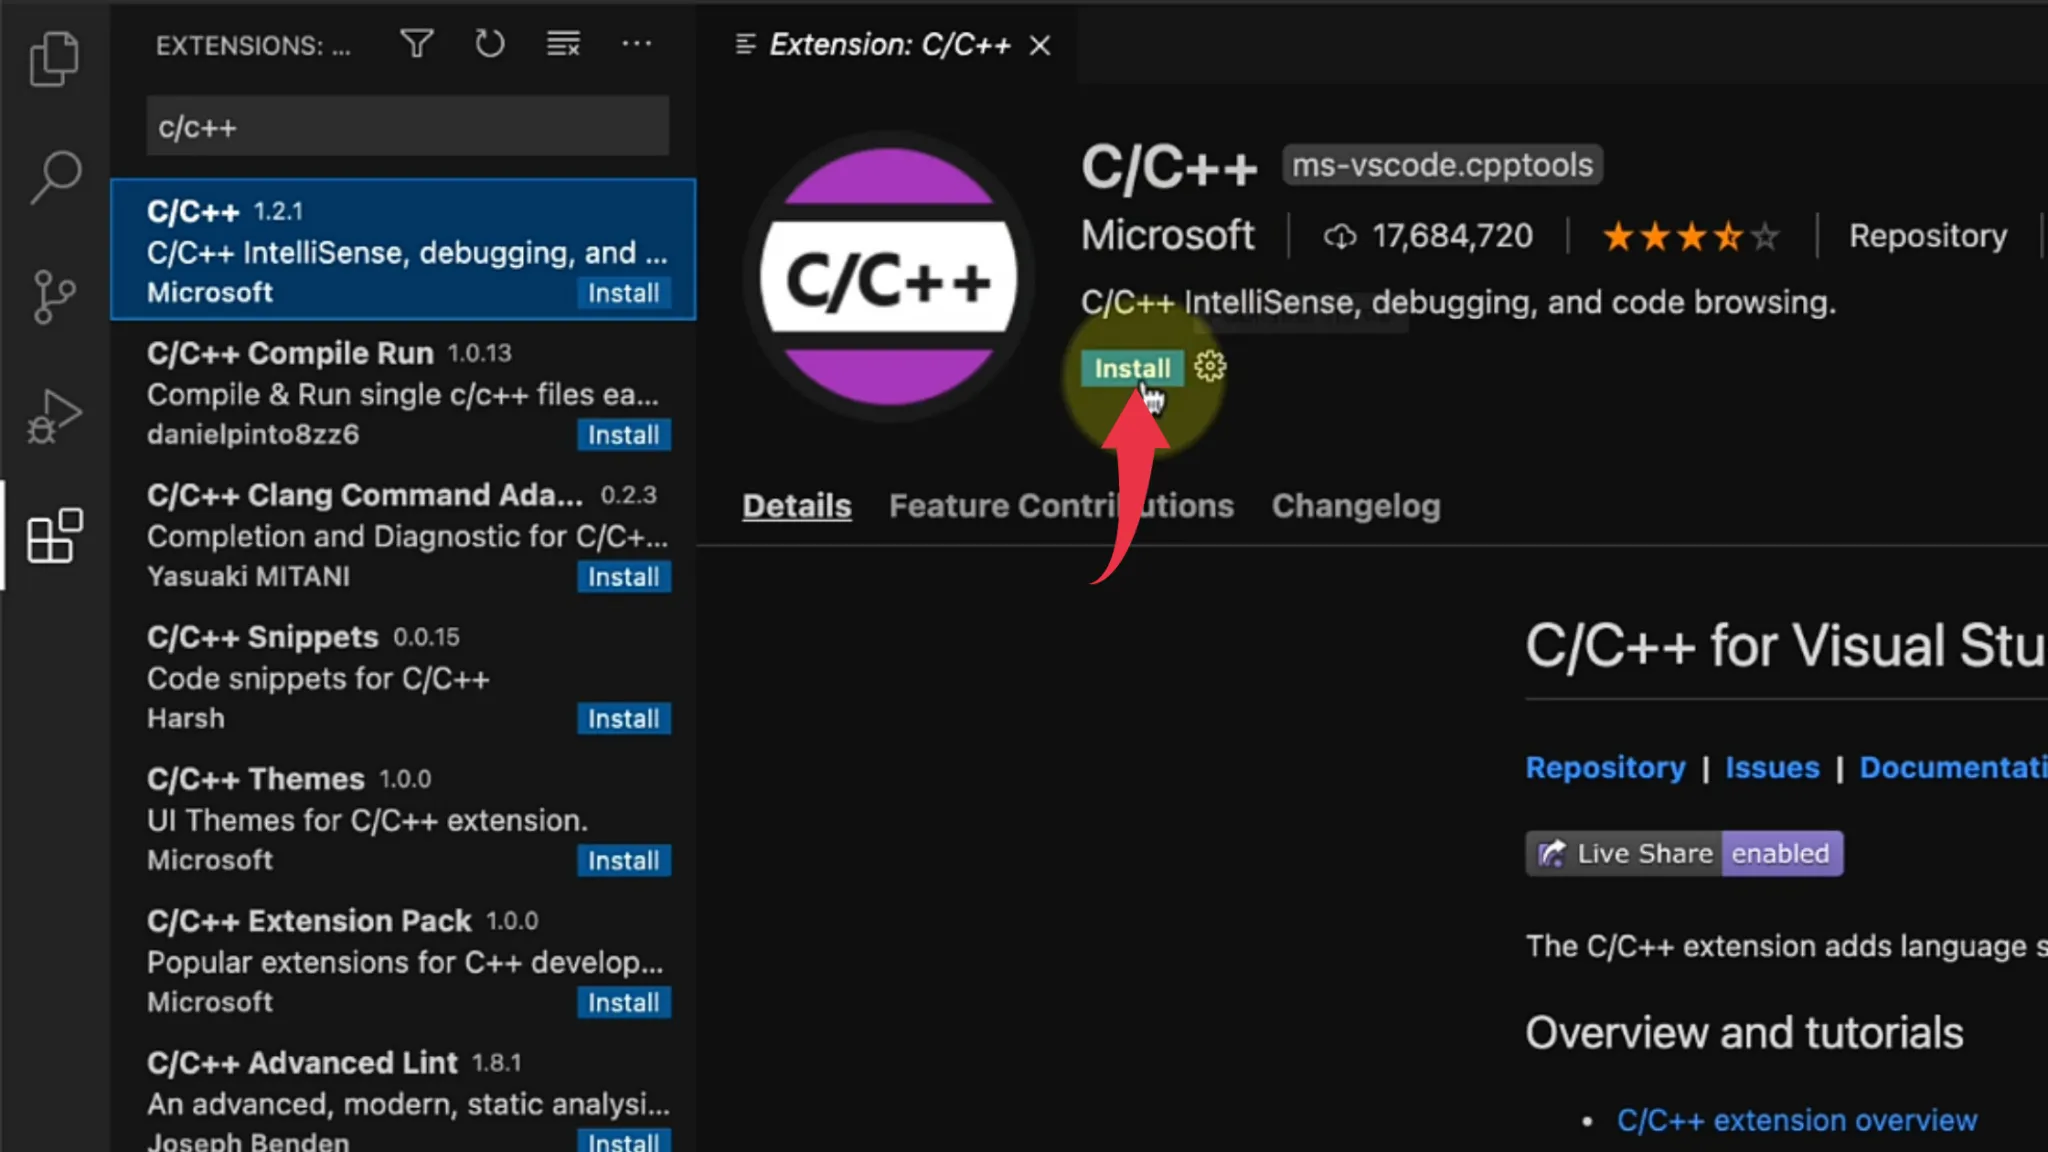


1. install Homebrew in your Mac system
`ruby -e "$(curl -fsSL https://raw.githubusercontent.com/Homebrew/ins tall/master/install)" < /dev/null 2> /dev/null`

2. install the MinGw compiler on your Mac OS
`brew install MinGW-w64`

3. in VS code click on the extension button and in the search bar type C/C++, select the first option from Microsoft and click on the small blue install button.

4. Again in the search bar type code runner, select the first option from Jun Han and click on the install button.

5. To Run the program press Cmd+Alt+N.

6. Open up settings by pressing Cmd+, In the search bar type Run In Terminal and hit enter. Scroll down and tick the Code Runner: Run in Terminal checkbox.

## References

1. [How to run C and C++ on Google Colab](https://cppsecrets.com/users/1102811497104117108109111104116975048484864103109971051084699111109/How-to-run-C-and-C00-on-Google-Colab.php)
2. [Book - Head first C](https://learning.oreilly.com/library/view/head-first-c/9781449335649/ch01.html#but_how_do_you_run_the_programquestion_m)
3. [Why isn't a binary file shown as 0s and 1s?](https://apple.stackexchange.com/questions/364789/why-isnt-a-binary-file-shown-as-0s-and-1s)
4. [How to Run C in Visual Studio Code on Mac Os](https://www.youtube.com/watch?v=pdfLW9PSrhQ)